In [26]:
import random
import pandas as pd

data = pd.read_csv('brain_body.csv', names=['brain','body'])
x = data['brain'].tolist()
y = data['body'].tolist()

initial_c = 0
initial_m = 0

num_iteration = 1000
print(data)

      brain      body
0    6.1101  17.59200
1    5.5277   9.13020
2    8.5186  13.66200
3    7.0032  11.85400
4    5.8598   6.82330
5    8.3829  11.88600
6    7.4764   4.34830
7    8.5781  12.00000
8    6.4862   6.59870
9    5.0546   3.81660
10   5.7107   3.25220
11  14.1640  15.50500
12   5.7340   3.15510
13   8.4084   7.22580
14   5.6407   0.71618
15   5.3794   3.51290
16   6.3654   5.30480
17   5.1301   0.56077
18   6.4296   3.65180
19   7.0708   5.38930
20   6.1891   3.13860
21  20.2700  21.76700
22   5.4901   4.26300
23   6.3261   5.18750
24   5.5649   3.08250
25  18.9450  22.63800
26  12.8280  13.50100
27  10.9570   7.04670
28  13.1760  14.69200
29  22.2030  24.14700
..      ...       ...
67  10.2360   7.77540
68   5.4994   1.01730
69  20.3410  20.99200
70  10.1360   6.67990
71   7.3345   4.02590
72   6.0062   1.27840
73   7.2259   3.34110
74   5.0269  -2.68070
75   6.5479   0.29678
76   7.5386   3.88450
77   5.0365   5.70140
78  10.2740   6.75260
79   5.1077   2.05760
80   5.729

In [27]:
def predict(m,x,c):
    return m*x + c

In [28]:
def computer_error(m,c,x_list,y_list):
    sum_squared_error = 0
    for x,y in zip(x_list,y_list):
        prediction = m*x + c
        sum_squared_error += (y - prediction)**2
    return sum_squared_error/len(x_list)

In [29]:
computer_error(1,0,x,y)

14.891711085859795

Error Function: 
![linear_regression_error1.png](attachment:linear_regression_error1.png)

Partial Derivative:
![linear_regression_gradient1.png](attachment:linear_regression_gradient1.png)


In [30]:
def step_gradient(m_current, c_current, x_list, y_list,learning_rate = 0.0001):
    c_gradient = 0
    m_gradient = 0
    
    N = float(len(x_list))
    
    for x, y in zip(x_list,y_list):
        prediction = y - m_current*x + c_current
        c_gradient += -(2/N)*prediction
        m_gradient += -(2/N)*x*prediction
    new_c = c_current - learning_rate*c_gradient 
    new_m = m_current - learning_rate*m_gradient
    return [new_m, new_c]
        

In [31]:
# Did not understant step gradient well... need some calculus study

Learning Rate 0.1 m = 0 c =  0 error= 64.14546775491131
Learning Rate 0.01 m = 0 c =  0 error= 64.14546775491131
Learning Rate 0.001 m = 0.8084459571371777 c =  -0.04602184294743381 error= 11.652547525902989
m = 0.7857363412031447 c =  -0.1766861019144735 error= 11.569238590902575


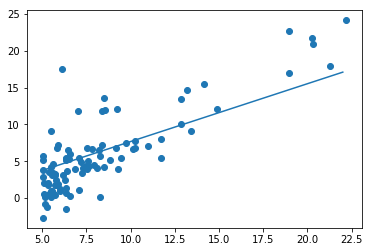

In [32]:
m = initial_m
c = initial_c
num_iteration = 100
error = computer_error(m,c, x,y)
learning_rate = 1
for i in range(num_iteration):
    m_j, c_j = step_gradient(m,c, x,y, learning_rate)
    error_j = computer_error(m_j,c_j, x,y)
    if error_j > error:
        if learning_rate>0.00000000001:
            learning_rate/=10
            print('Learning Rate', learning_rate,'m =',m,'c = ',c,'error=', computer_error(m,c, x,y))

            continue
        break
    error = error_j
    m = m_j
    c = c_j
    
print('m =',m,'c = ',c,'error=', computer_error(m,c, x,y))

%matplotlib inline

import matplotlib.pyplot as plt
plt.scatter(x,y)
X = [i for i in range(int(min(x)),int(max(x))+1)]
Y = [predict(m,i,c) for i in X]
plt.plot(X,Y)


In [33]:
# Using Scikit Learn

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
X_for_sklearn = [[i] for i in x]
engine = LinearRegression()
engine.fit(X_for_sklearn,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

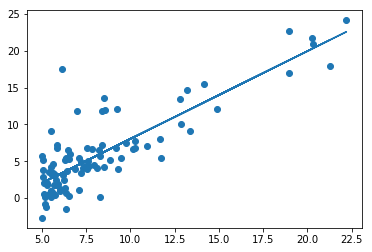

In [36]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.scatter(x,y)
X = [i for i in range(int(min(x)),int(max(x))+1)]
Y = [predict(m,i,c) for i in X]
#print(x,engine.predict(X_for_sklearn).shape)
plt.plot(x,engine.predict(X_for_sklearn))

In [37]:
engine.score(X_for_sklearn,y)

0.70203155378413973